### 方向データの異常検知

In [20]:
from scipy.special import iv
import numpy as np
import matplotlib.pyplot as plt

def von_mises_fisher_dist(x, mu, kappa, M=None):
    """
    第1種変形ベッセル関数 iv(alpha, kappa)
    """
    if M is None:
        M = len(x)
    return (kappa**(M/2-1)) / ((2*np.pi)**(M/2)*iv(M/2-1, kappa)) * np.exp(kappa*mu.T@x)

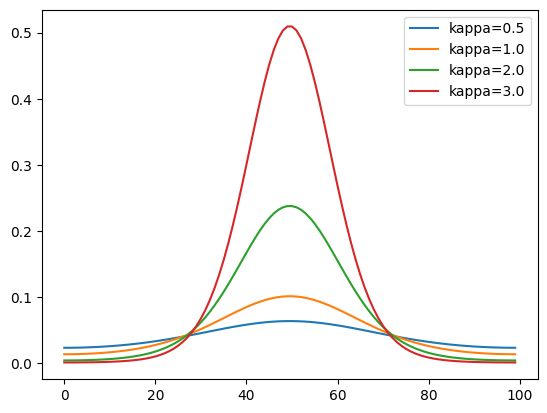

In [52]:
M = 10
mu = np.zeros(M)
mu[:2] = 1/np.sqrt(2)

thetas = np.linspace(-np.pi, np.pi, 100)
_mu_rot = mu[:2]@np.array([[np.cos(thetas), -np.sin(thetas)],[np.sin(thetas), np.cos(thetas)]])
X = np.zeros((M, 100))
X[:2,:] = _mu_rot

kappas = [0.5, 1.0, 2.0, 3.0]

for k in kappas:
    plt.plot(von_mises_fisher_dist(X, mu, k, M), label='kappa='+str(k))
xplt.legend();

In [383]:
M = 3
N = 200

X = np.random.normal(size=(N,M), loc=1, scale=0.3)
X = X / np.sqrt(np.sum(X**2, axis=1).reshape(-1,1))

In [384]:
m = np.mean(X, axis=0)
mu_hat = m / np.sqrt(m.T@m)
print('mu_hat: ', mu_hat)

mu_hat:  [0.56776179 0.57386883 0.59018736]


In [385]:
a = 1 - mu_hat@X.T

In [386]:
a_mean = np.mean(a)
a_squre_mean = np.mean(a**2)

m_mo = (2*a_mean**2)/(a_squre_mean - a_mean**2)
s_mo = (a_squre_mean-a_mean**2)/(2*a_mean)
print('m_mo: ', m_mo)
print('s_mo: ', s_mo)

m_mo:  1.801135572142024
s_mo:  0.016300872971817537


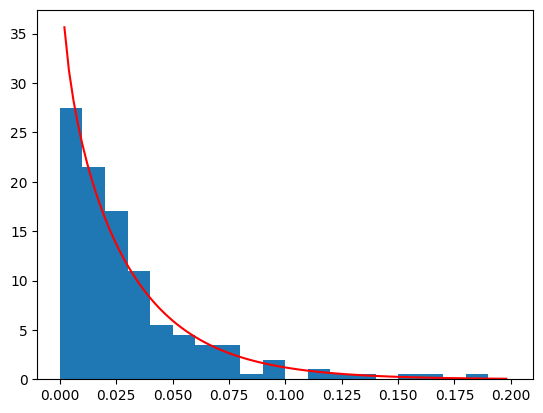

In [387]:
from scipy.stats import chi2
import pandas as pd

x=np.arange(0,0.2,0.002)

plt.hist(a, density=True, range=(0,0.2), bins=20)
plt.plot(x,chi2.pdf(x, df=m_mo, scale=s_mo), color='red')

In [388]:
alpha = 0.05
ath = chi2.ppf(q=1-alpha, df=m_mo, scale=s_mo)
print('ath: ', ath)

ath:  0.09128804674176179


In [389]:
theta1, theta2 = np.mgrid[0:2*np.pi:100j, 0:2*np.pi:100j]

x = np.cos(theta1)*np.sin(theta2)
y = np.sin(theta1)*np.sin(theta2)
z = np.cos(theta2)

x_sp =np.concatenate([x.reshape(-1,1),
                      y.reshape(-1,1),
                      z.reshape(-1,1)],
                     axis=1)

a_sp = (1 - mu_hat@x_sp.T).reshape(100,100)

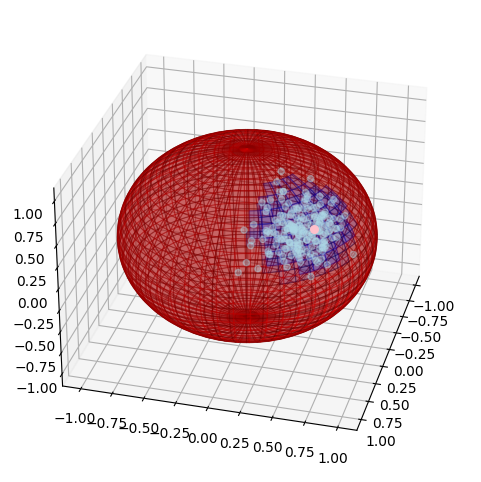

In [395]:
colors = np.empty(x.shape, dtype=str)
for yy in range(len(y)):
    for xx in range(len(x)):
        colors[xx, yy] = 'r' if a_sp[xx,yy] > ath else 'b'

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0],X[:,1],X[:,2], alpha=.4, color='lightblue')
ax.scatter(mu_hat[0]*1.2,mu_hat[1]*1.2,mu_hat[2]*1.2, color='pink', s=30)
ax.plot_wireframe(x, y, z, color='black', linewidth=0.5, alpha=0.5)
ax.plot_surface(x,y,z,facecolors=colors, alpha=.2,edgecolor ='none')
ax.view_init(elev=30, azim=15)